# Risk Analysis of Dataset Home Credit Default Risk
por Gabriely da Mata

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# About the dataset

<a href='https://www.homecredit.net/about-us.aspx'>About Home Credit</a> 

- This dataset comes from the competition present in Kaggle available <a href='https://www.kaggle.com/c/home-credit-default-risk'>here</a>

- This image contains the description of how work the data
<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png"></img>



**The purpose of the document is based on an exploratory analysis of the data and with a classification model to predict whether a customer will be a good payer.**




# Load Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

In [ ]:
application_test = pd.read_csv('drive/MyDrive/DT&ML/application_test.csv')
application_train = pd.read_csv('drive/MyDrive/DT&ML/application_train.csv')
bureau = pd.read_csv('drive/MyDrive/DT&ML/bureau.csv')

In [ ]:
application_train.drop(columns = 'Unnamed: 0', inplace=True)
application_test.drop(columns = 'Unnamed: 0', inplace=True)
bureau.drop(columns = 'Unnamed: 0', inplace=True)

# Data Overview

In [ ]:
pd.set_option("display.max.columns", None)

In [ ]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


**For the exploratory analisys we must filter the dataset with just the information of client and information of transation**

- This file contains the test data to be predict, information of client

In [ ]:
applic_test_cols = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE','CODE_GENDER', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','FLAG_OWN_CAR', 'FLAG_OWN_REALTY'
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED',
       'NAME_FAMILY_STATUS','ORGANIZATION_TYPE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE',]
application_test_filter = application_test.filter(items = applic_test_cols)
application_test_filter.to_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/application_test_filter.csv')

- This contains the train data to be predict, information of client

In [ ]:
applic_train_cols = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE','CODE_GENDER', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','FLAG_OWN_CAR', 'FLAG_OWN_REALTY'
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED',
       'NAME_FAMILY_STATUS','ORGANIZATION_TYPE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE',]
application_train_filter = application_train.filter(items= applic_train_cols)
application_train_filter.to_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/application_train_filter.csv')

- This contains details of each person's previous loan

In [ ]:
bureau_cols = ['SK_ID_CURR', 'CREDIT_ACTIVE',
       'DAYS_CREDIT','CNT_CREDIT_PROLONG', 
       'AMT_CREDIT_SUM','CREDIT_TYPE',]

prev_loan_filter = bureau.filter(items = bureau_cols)
prev_loan_filter.to_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/previous_loan_filter.csv')

In [ ]:
application_test.columns.values

In [ ]:
application_train.columns.values

In [ ]:
bureau.columns.values

In [ ]:
application_test_filter = pd.read_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/application_test_filter.csv')
application_train_filter = pd.read_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/application_train_filter.csv')
previous_loan_filter = pd.read_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/previous_loan_filter.csv')

In [ ]:
application_train_filter.drop(columns = 'Unnamed: 0', inplace=True)
application_test_filter.drop(columns = 'Unnamed: 0', inplace=True)
previous_loan_filter.drop(columns = 'Unnamed: 0', inplace=True)

# Verify Missing Data

In [ ]:
#Function will return a table with the total of Na values and the percent
def missing_data(data):
  total = data.isnull().sum().sort_values(ascending= False)
  percent = (data.isnull().mean() * 100).sort_values(ascending=False)
  return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data(application_train_filter).head(10)

,Total,Percent
OWN_CAR_AGE,202929,65.990810
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650
DAYS_LAST_PHONE_CHANGE,1,0.000325
NAME_EDUCATION_TYPE,0,0.000000
ORGANIZATION_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
DAYS_EMPLOYED,0,0.000000
DAYS_BIRTH,0,0.000000
NAME_HOUSING_TYPE,0,0.000000


In [ ]:
missing_data(application_test_filter).head(10)

,Total,Percent
OWN_CAR_AGE,32312,66.289184
AMT_ANNUITY,24,0.049237
Unnamed: 0,0,0.000000
NAME_HOUSING_TYPE,0,0.000000
CNT_FAM_MEMBERS,0,0.000000
ORGANIZATION_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
DAYS_EMPLOYED,0,0.000000
DAYS_BIRTH,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000


In [ ]:
missing_data(previous_loan_filter)

,Total,Percent
AMT_CREDIT_SUM,13,0.000757
Unnamed: 0,0,0.000000
SK_ID_CURR,0,0.000000
CREDIT_ACTIVE,0,0.000000
DAYS_CREDIT,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000
CREDIT_TYPE,0,0.000000


In [ ]:
#format of plot
%config InlineBackend.figure_format = 'svg'
#font parameter
plt.rcParams['font.family'] = 'sans-serif'

In [ ]:
#Heatmap for verify if missing data are correlated
ax = msno.heatmap(application_train_filter)
ax.get_figure().savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/corr_missing_data.png')
#The correlation is almost perfectly null

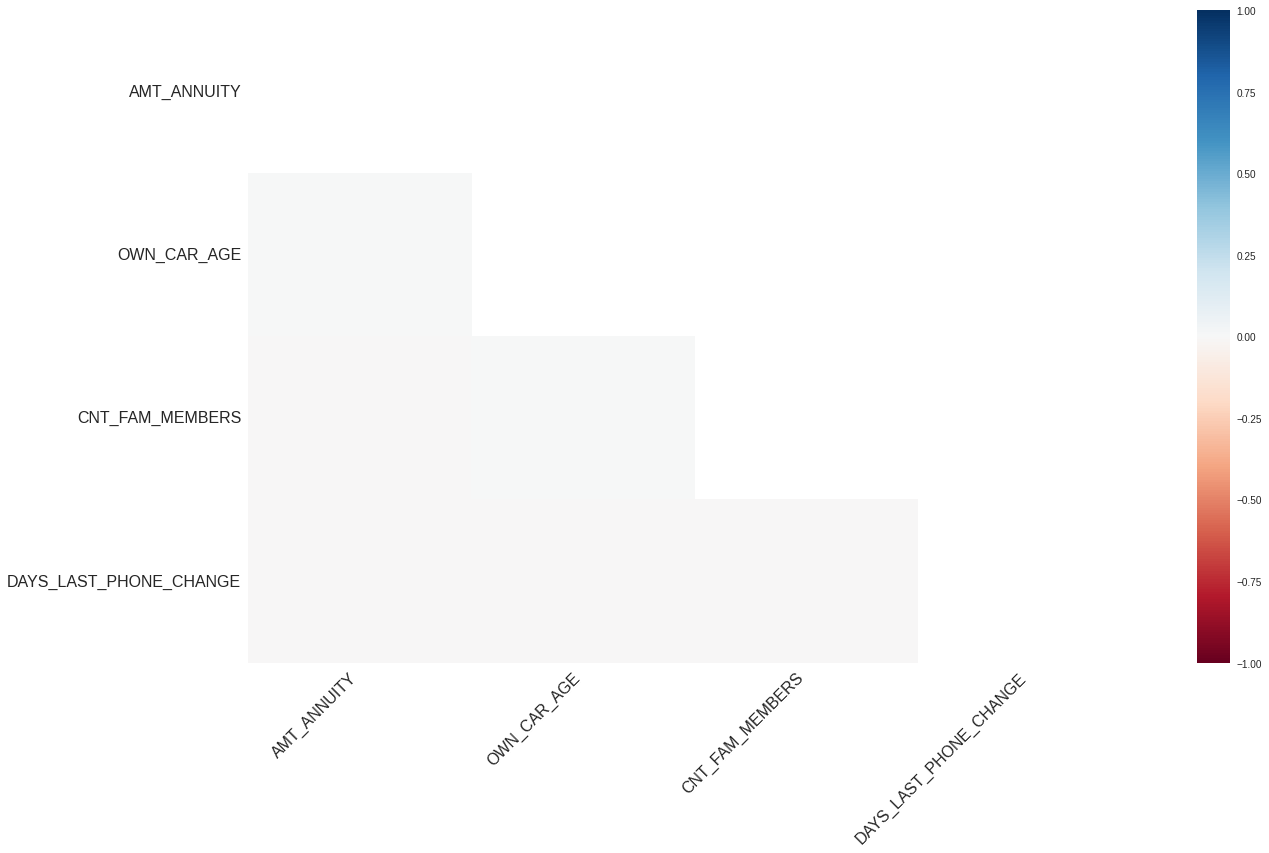

In [ ]:
ax = msno.heatmap(application_train_filter)

In [ ]:
application_train_filter['OWN_CAR_AGE'].fillna(0, inplace=True)

In [ ]:
application_train_filter.dropna(inplace=True)

In [ ]:
application_test_filter['OWN_CAR_AGE'].fillna(0, inplace=True)

In [ ]:
application_test_filter.dropna(inplace=True)

In [ ]:
application_test_filter.to_csv('drive/MyDrive/DT&ML/application_test.csv')
application_train_filter.to_csv('drive/MyDrive/DT&ML/application_train.csv')
previous_loan_filter.to_csv('drive/MyDrive/DT&ML/bureau.csv')

# Exploratory Analisys
**For the problem, we have the following questions**

- What features and what is their impact on whether the loan is repaid?

- And how these features affect repayment

**Function that goes return a barplot**



In [ ]:
def plot_bars(df, labels,title, multi):
  # fig, ax = plt.subplots(figsize=(10,5))
  x = np.array(range(1, df.shape[0]+1))
  color_list = ['#00408a','#0052b0' ,'#0264d4', '#0777f7', '#2189ff', '#3895ff','#4fa1ff', '#66adff', '#78b7ff', '#8cc2ff']
  if multi == False:
    fig, ax = plt.subplots(figsize=(10,5))
    width_bar = 0.2
    font = 14
  else:
    fig, ax = plt.subplots(figsize=(15,5))
    width_bar = 0.9
    font = 12
  bars = ax.bar(x, df['values'], width_bar, color=color_list)

  ax.grid(False)
  plt.text(x= 1.3, y= bars[0].get_height()+5000, 
          s= title,
          fontsize = 16,
          color = '#787878',
          weight = 'bold');

  title = title.replace(' ', '_')
  ax.set_xticks(x)
  ax.set_xticklabels(df['labels']);

  for idx, i in enumerate(bars):
        if idx < 6:
          height_bar = i.get_height()
          ax.annotate(
              '{:.1f}%'.format(100*height_bar/df['values'].sum()),
              xy=(i.get_x() + i.get_width(),  height_bar),              
              ha='center',
              va='bottom',
              fontsize=font,
              color="black",)
  plt.savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/{}.png'.format(title))
  plt.show()
  



**Function that will create a dataframe for value_counts**

In [ ]:
def df_value_counts(df, labels):
  df_counts = df.value_counts()
  df_ = pd.DataFrame({
      'labels': labels,
      'values': df_counts.values
  })
  return df_

**Function that goes return two barplot**




In [ ]:
def plot_bars2(df, legend, col1, col2, title):
  fig, ax = plt.subplots(figsize=(10,5))
  x = np.array(range(1, df.shape[0]+1))
  color_list = ['#0052b0' ]
  color_list1 = ['#78b7ff']
  width_bar = 0.2
  bar1 = ax.bar(x-width_bar/2, col1, width_bar, color=color_list)
  bar2 = ax.bar(x+width_bar/2, col2, width_bar, color=color_list1)

  ax.grid(False)
  plt.text(x= 1.3, y= bar1[0].get_height()/2, 
          s= title,
          fontsize = 16,
          color = '#787878',
          weight = 'bold');

  title = title.replace(' ', '_')
  ax.set_xticks(x)
  ax.set_xticklabels(df['Payment']);
  for b in bar1:
      height_bar = b.get_height()
      ax.annotate(
                  '{:.1f}%'.format(100 *height_bar/col1.sum()),
                  xy=(b.get_x() + b.get_width()/2,  height_bar),
                  ha='center',
                  va='bottom',
                  fontsize=10,
                  color="black",)
  for b in bar2:
      height_bar = b.get_height()
      ax.annotate(
                  '{:.1f}%'.format(100 *height_bar/col2.sum()),
                  xy=(b.get_x() + b.get_width()/2,  height_bar),
                  ha='center',
                  va='bottom',
                  fontsize=10,
                  color="black",)
  plt.savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/{}.png'.format(title))
  plt.legend(legend)
  plt.show()



**Function who will return two figures**

In [ ]:
def plot_two_figures(df, col1, col2, title):
  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

  x = np.array(range(1, df.shape[0]+1))
  color_list = ['#00408a','#0052b0' ,'#0264d4', '#0777f7', '#2189ff', '#3895ff','#4fa1ff', '#66adff', '#78b7ff', '#8cc2ff']
  color_list1 = ['#00408a','#0052b0' ,'#0264d4', '#0777f7', '#2189ff', '#3895ff','#4fa1ff', '#66adff', '#78b7ff', '#8cc2ff']
  width_bar = .9
  bar1 = ax[0,].bar(x, col1, width_bar, color=color_list)
  bar2 = ax[1,].bar(x, col2, width_bar, color=color_list1)

  ax[0,].grid(False)
  ax[1,].grid(False)
  plt.text(x= 1.7, y= bar1[0].get_height()/4, 
          s= title,
          fontsize = 16,
          color = '#787878',
          weight = 'bold');

  title = title.replace(' ', '_')
  ax[0,].set_title('Paid')
  ax[1,].set_title('Not Paid')
  ax[0,].set_xticks(x)
  ax[1,].set_xticks(x)
  ax[0,].set_xticklabels(df[df.columns[0]].values);
  ax[1,].set_xticklabels(df[df.columns[0]].values);
  for idx, b in enumerate(bar1):
      height_bar = b.get_height()
      if idx < 6:
        ax[0,].annotate(
                    '{:.1f}%'.format(100 *height_bar/col1.sum()),
                    xy=(b.get_x() + b.get_width()/2,  height_bar),
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color="black",)
  for idx, b in enumerate(bar2):
      height_bar = b.get_height()
      if idx < 6:
        ax[1,].annotate(
                    '{:.1f}%'.format(100 *height_bar/col2.sum()),
                    xy=(b.get_x() + b.get_width()/2,  height_bar),
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color="black",)
  plt.savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/{}.png'.format(title))
  plt.show()



##Total Repayment

Feature 'Target' **0** means loan is repaid and **1** means not

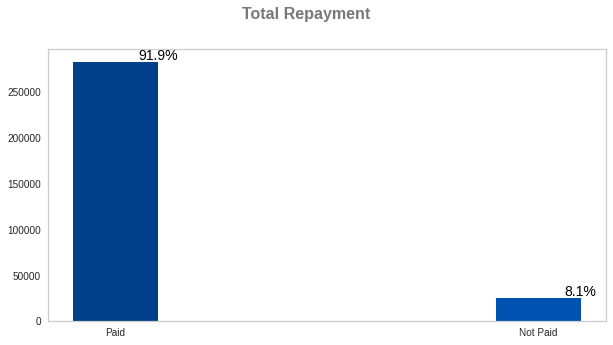

In [ ]:
labels = ['Paid', 'Not Paid']
plot_bars(df_value_counts(application_train_filter['TARGET'], labels), labels, 'Total Repayment', False)

##Type of Contract

We see that revolving loans concentrate less than 10%

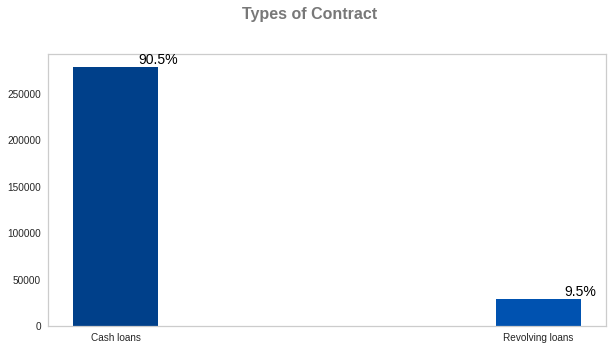

In [ ]:
labels = ['Cash loans', 'Revolving loans']
plot_bars(df_value_counts(application_train_filter['NAME_CONTRACT_TYPE'], labels), labels, 'Types of Contract', False)

**relation between loan payments and the type of contract**

In [ ]:
Cash = application_train_filter[application_train_filter['NAME_CONTRACT_TYPE'] == 'Cash loans']\
.filter(items= ['NAME_CONTRACT_TYPE', 'TARGET']).groupby('TARGET').count()


In [ ]:
Revolving = application_train_filter[application_train_filter['NAME_CONTRACT_TYPE'] == 'Revolving loans']\
.filter(items= ['NAME_CONTRACT_TYPE', 'TARGET']).groupby('TARGET').count()


In [ ]:
df_merge = pd.concat([Cash, Revolving], axis=1, keys=['Cash Loans', 'Revolving Loans'])
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_merge['Payment'] = labels

In [ ]:
df_contract = pd.DataFrame({
      'Payment': df_merge['Payment'].values,
      'Cash Loans': np.array(df_merge['Cash Loans'].values).reshape(1,2)[0],
      'Revolving Loans': np.array(df_merge['Revolving Loans'].values).reshape(1,2)[0]
})
df_contract

,Payment,Cash Loans,Revolving Loans
0,Paid,255011,27675
1,Not Paid,23221,1604


We see that revolving loans are more repaid than cash loans, but cash loans are in greater quantity

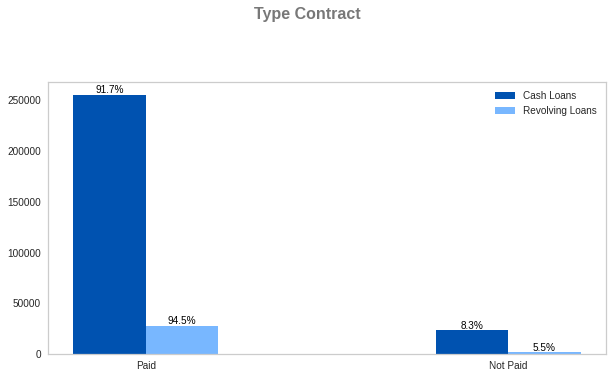

In [ ]:
legend = df_contract.columns[1:].values
plot_bars2(df_contract, legend, df_contract['Cash Loans'], \
           df_contract['Revolving Loans'], 'Type Contract')

##Code Gender

imputing the max data in variable 'CODE_GENDER' because has a NA value


In [ ]:
application_train_filter['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
application_train_filter.loc[application_train_filter.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'

In [ ]:
application_train_filter['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

**We see that woman contract loan more than men**

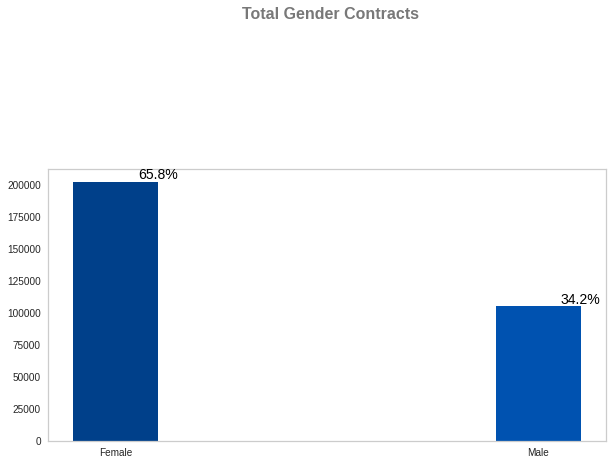

In [ ]:
labels = ['Female', 'Male']
plot_bars(df_value_counts(application_train_filter['CODE_GENDER'], labels), labels, 'Total Gender Contracts', False)

**relation between loan payments and the type of contract**

In [ ]:
F = application_train_filter[application_train_filter['CODE_GENDER'] == 'F']\
.filter(items=['TARGET', 'CODE_GENDER']).groupby(['TARGET']).count()

In [ ]:
M = application_train_filter[application_train_filter['CODE_GENDER'] == 'M']\
.filter(items=['TARGET', 'CODE_GENDER']).groupby(['TARGET']).count()

In [ ]:
df_merge = pd.concat([F, M], axis=1, keys=['Female', 'Male'])
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_merge['Payment'] = labels
df_merge

,Female,Male,Payment
,CODE_GENDER,CODE_GENDER,
TARGET,,,
0,188282,94404,Paid
1,14170,10655,Not Paid


In [ ]:
df_gender = pd.DataFrame({
      'Payment': df_merge['Payment'].values,
      'Female': np.array(df_merge['Female'].values).reshape(1,2)[0],
      'Male': np.array(df_merge['Male'].values).reshape(1,2)[0]
})
df_gender

,Payment,Female,Male
0,Paid,188282,94404
1,Not Paid,14170,10655


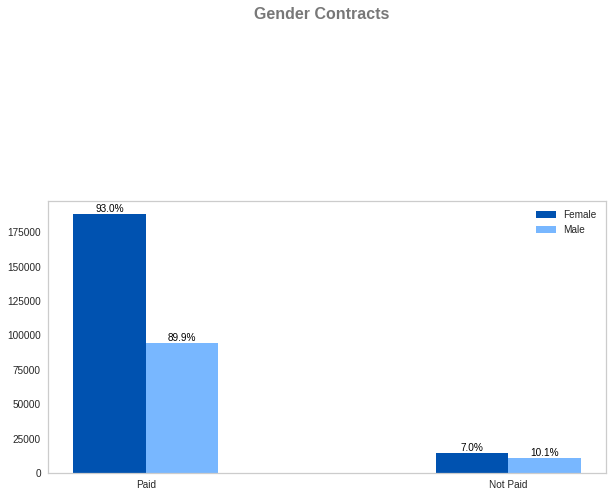

In [ ]:
legend = ['Female', 'Male']
plot_bars2(df_gender, legend, df_gender['Female'], df_gender['Male'], 'Gender Contracts')

##FLAG_OWN_CAR



**Most of clients do not have their own car.**

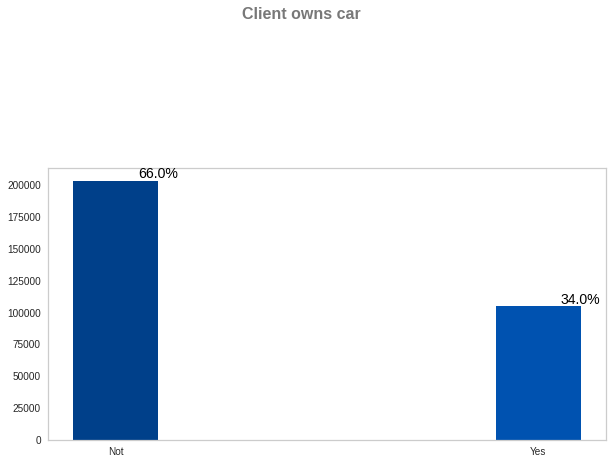

In [ ]:
labels = ['Not', 'Yes']
plot_bars(df_value_counts(application_train_filter['FLAG_OWN_CAR'], labels), labels,  'Client owns car', False)

In [ ]:
N = application_train_filter[application_train_filter['FLAG_OWN_CAR'] == 'Y']\
.filter(['TARGET','FLAG_OWN_CAR']).groupby('TARGET').count()

In [ ]:
Y = application_train_filter[application_train_filter['FLAG_OWN_CAR'] == 'N']\
.filter(['TARGET','FLAG_OWN_CAR']).groupby('TARGET').count()

In [ ]:
df_merge = pd.concat([N, Y], axis=1, keys=['Not', 'Yes'])
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_merge['Payment'] = labels
df_merge

,Not,Yes,Payment
,FLAG_OWN_CAR,FLAG_OWN_CAR,
TARGET,,,
0,97011,185675,Paid
1,7576,17249,Not Paid


In [ ]:
df_car = pd.DataFrame({
      'Payment': df_merge['Payment'].values,
      'Not': np.array(df_merge['Not'].values).reshape(1,2)[0],
      'Yes': np.array(df_merge['Yes'].values).reshape(1,2)[0]
})
df_car

,Payment,Not,Yes
0,Paid,97011,185675
1,Not Paid,7576,17249


**Clients who own a car are more likely to repay the loan than those who do not.**

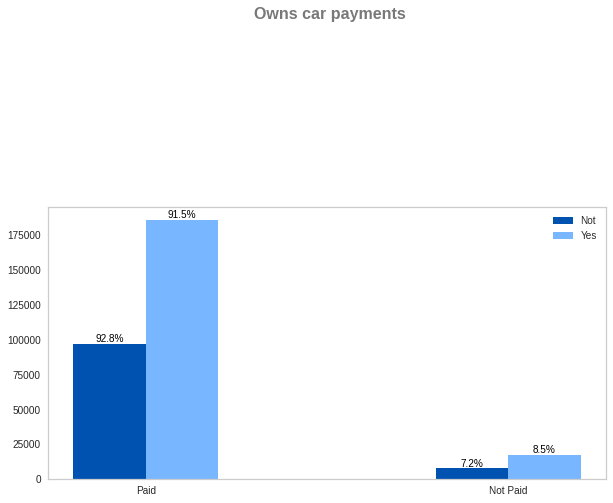

In [ ]:
legend = ['Not', 'Yes']
plot_bars2(df_car, legend, df_car['Not'], df_car['Yes'], 'Owns car payments')

##CNT_CHILDREN
Number of children

**Clients who do not have children are the ones who take out loans the most**

In [ ]:
children = application_train_filter['CNT_CHILDREN'].value_counts().index.values

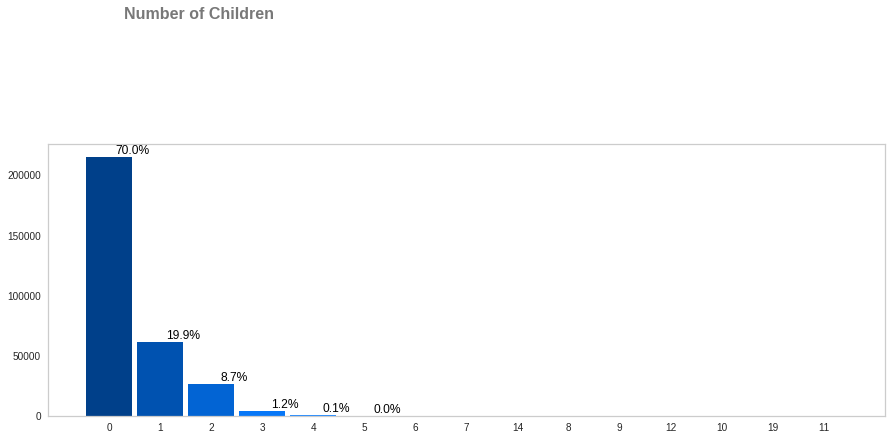

In [ ]:
labels = children
plot_bars(df_value_counts(application_train_filter['CNT_CHILDREN'], labels), labels, 'Number of Children', True)

Payments related to the number of children

In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_child = pd.DataFrame({
      'Payment': labels,
})
df_child

,Payment
0,Paid
1,Not Paid


In [ ]:
for i in application_train_filter['CNT_CHILDREN'].value_counts().index:
  value = application_train_filter[application_train_filter['CNT_CHILDREN'] == i]\
  .filter(['TARGET','CNT_CHILDREN']).groupby('TARGET').count().values.ravel()
  value = pd.Series(value)
  df_child[i] = value

As this result has values of Na, it may be that those who have more than 7 children paid the loan, so there is no data on those who did not pay

In [ ]:
df_child

,Payment,0,1,2,3,4,5,6,7,14,8,9,12,10,19,11
0,Paid,198762,55665,24416,3359,374,77,15,7.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0
1,Not Paid,16609,5454,2333,358,55,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_child.fillna(0, inplace = True)

In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_child = pd.DataFrame({
      'Children' : df_child.columns[1:].values,
      'Paid' : df_child[df_child['Payment'] == 'Paid'].values.ravel()[1:],
      'Not Paid': df_child[df_child['Payment'] == 'Not Paid'].values.ravel()[1:]
})
df_child

,Children,Paid,Not Paid
0,0,198762,16609
1,1,55665,5454
2,2,24416,2333
3,3,3359,358
4,4,374,55
5,5,77,7
6,6,15,6
7,7,7.0,0.0
8,14,3.0,0.0
9,8,2.0,0.0


**Who has 1 to 4 children is more likely not to pay**

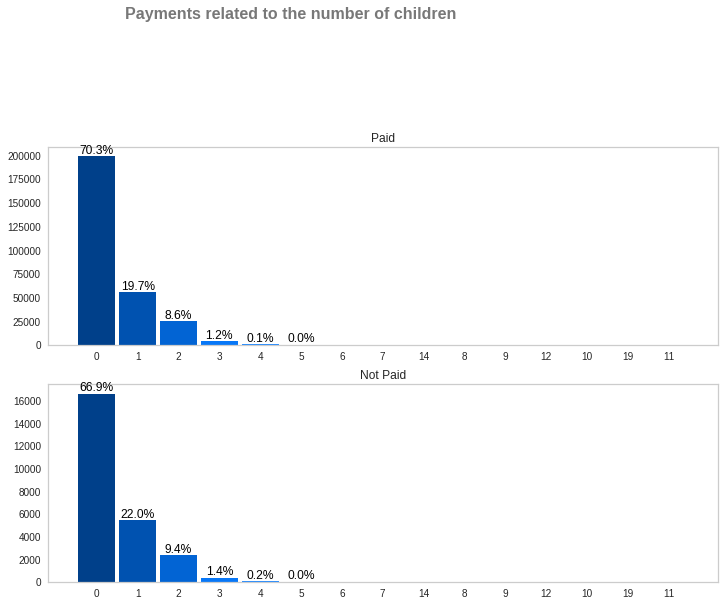

In [ ]:
plot_two_figures(df_child, df_child['Paid'], df_child['Not Paid'], 'Payments related to the number of children')

In [ ]:
application_train_filter['NAME_EDUCATION_TYPE'].value_counts().index

Index(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype='object')

##NAME_EDUCATION_TYPE


**The most of clients has secondary school**

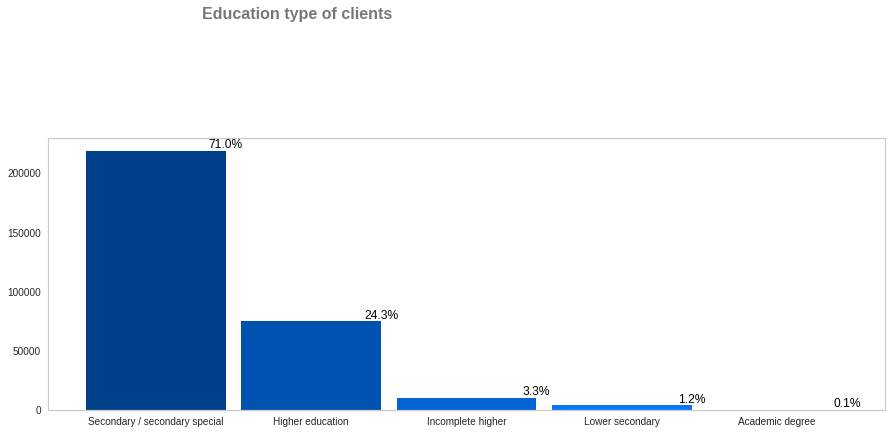

In [ ]:
plot_bars(df_value_counts(application_train_filter['NAME_EDUCATION_TYPE'],\
                          application_train_filter['NAME_EDUCATION_TYPE'].value_counts().index),\
          application_train_filter['NAME_EDUCATION_TYPE'].value_counts().index, 'Education type of clients', True)

In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_school = pd.DataFrame({
      'Payment': labels,
})
df_school

,Payment
0,Paid
1,Not Paid


In [ ]:
for i in application_train_filter['NAME_EDUCATION_TYPE'].value_counts().index:
  value = application_train_filter[application_train_filter['NAME_EDUCATION_TYPE'] == i]\
  .filter(['TARGET','NAME_EDUCATION_TYPE']).groupby('TARGET').count().values.ravel()
  value = pd.Series(value)
  df_school[i] = value

In [ ]:
df_school

,Payment,Secondary / secondary special,Higher education,Incomplete higher,Lower secondary,Academic degree
0,Paid,198867,70854,9405,3399,161
1,Not Paid,19524,4009,872,417,3


In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_school = pd.DataFrame({
      'Education_Type' : df_school.columns[1:].values,
      'Paid' : df_school[df_school['Payment'] == 'Paid'].values.ravel()[1:],
      'Not Paid': df_school[df_school['Payment'] == 'Not Paid'].values.ravel()[1:]
})
df_school

,Education_Type,Paid,Not Paid
0,Secondary / secondary special,198867,19524
1,Higher education,70854,4009
2,Incomplete higher,9405,872
3,Lower secondary,3399,417
4,Academic degree,161,3


**The most who has secondary school don't repaid the loan**

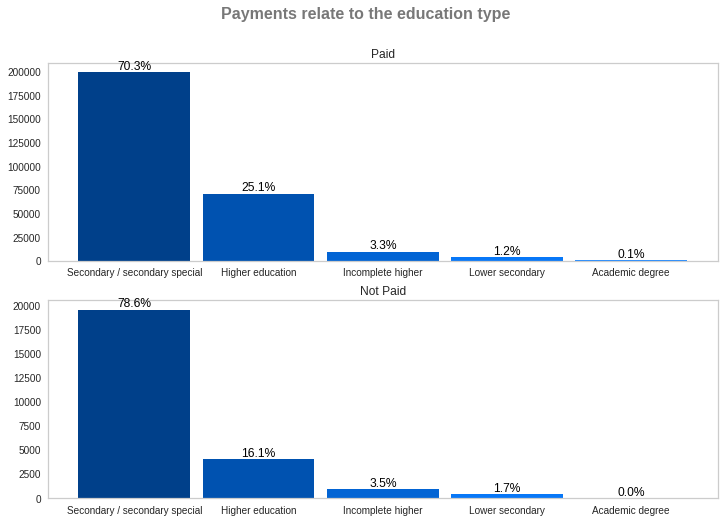

In [ ]:
plot_two_figures(df_school, df_school['Paid'], df_school['Not Paid'], 'Payments relate to the education type')

##NAME_HOUSING_TYPE

In [ ]:
application_train_filter['NAME_HOUSING_TYPE'].value_counts().index

Index(['House / apartment', 'With parents', 'Municipal apartment',
       'Rented apartment', 'Office apartment', 'Co-op apartment'],
      dtype='object')

**Majority of clients live in a house or apartment and just less 5% live with parents**

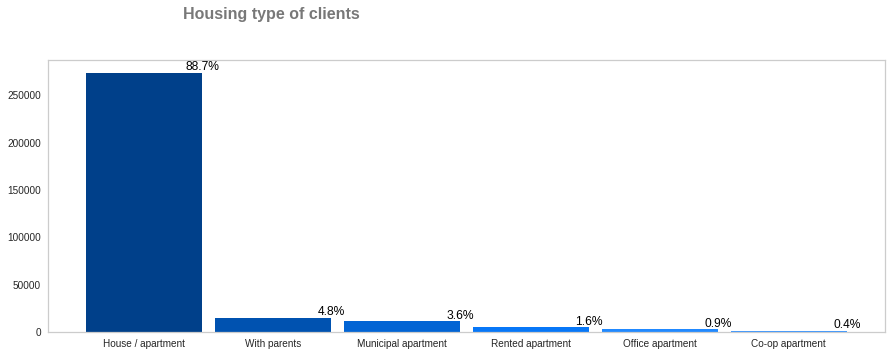

In [ ]:
plot_bars(df_value_counts(application_train_filter['NAME_HOUSING_TYPE'],\
                          application_train_filter['NAME_HOUSING_TYPE'].value_counts().index),\
          application_train_filter['NAME_HOUSING_TYPE'].value_counts().index, 'Housing type of clients', True)

In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_house = pd.DataFrame({
      'Payment': labels,
})
df_house

,Payment
0,Paid
1,Not Paid


In [ ]:
for i in application_train_filter['NAME_HOUSING_TYPE'].value_counts().index:
  value = application_train_filter[application_train_filter['NAME_HOUSING_TYPE'] == i]\
  .filter(['TARGET','NAME_HOUSING_TYPE']).groupby('TARGET').count().values.ravel()
  value = pd.Series(value)
  df_house[i] = value

In [ ]:
df_house

,Payment,House / apartment,With parents,Municipal apartment,Rented apartment,Office apartment,Co-op apartment
0,Paid,251596,13104,10228,4280,2445,1033
1,Not Paid,21272,1736,955,601,172,89


In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_house = pd.DataFrame({
      'Housing_Type' : df_house.columns[1:].values,
      'Paid' : df_house[df_house['Payment'] == 'Paid'].values.ravel()[1:],
      'Not Paid': df_house[df_house['Payment'] == 'Not Paid'].values.ravel()[1:]
})
df_house

,Housing_Type,Paid,Not Paid
0,House / apartment,251596,21272
1,With parents,13104,1736
2,Municipal apartment,10228,955
3,Rented apartment,4280,601
4,Office apartment,2445,172
5,Co-op apartment,1033,89


**The largest number of clients who live with their parents did not pay the loan**

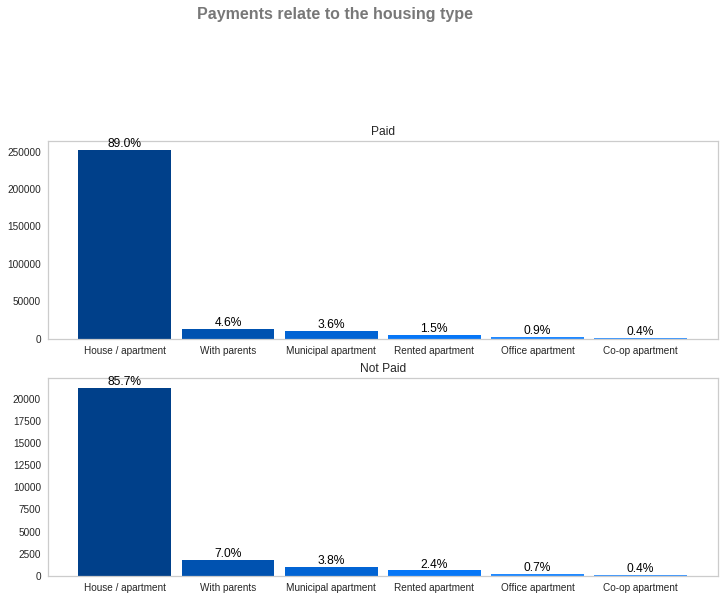

In [ ]:
plot_two_figures(df_house, df_house['Paid'], df_house['Not Paid'], 'Payments relate to the housing type')

##NAME_FAMILY_STATUS

In [ ]:
application_train_filter['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

**Most clients are married and the number of separated is almost equal to the number of widows**

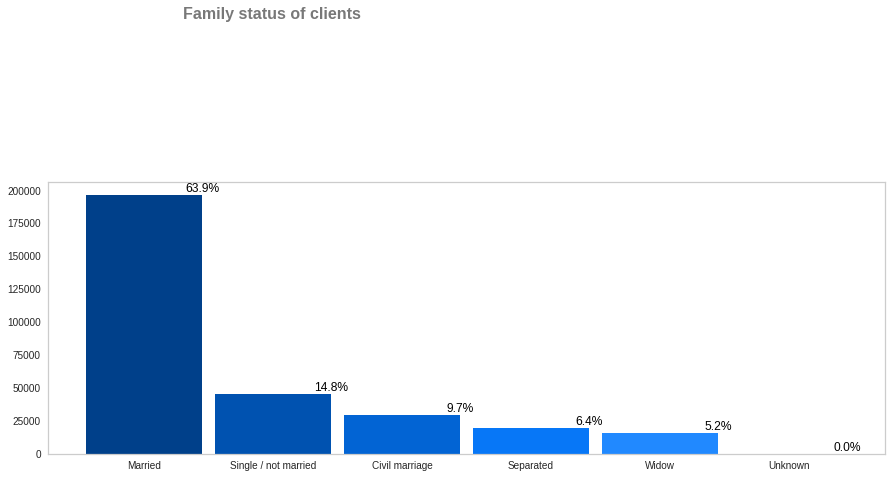

In [ ]:
plot_bars(df_value_counts(application_train_filter['NAME_FAMILY_STATUS'],\
                          application_train_filter['NAME_FAMILY_STATUS'].value_counts().index) ,\
          application_train_filter['NAME_FAMILY_STATUS'].value_counts().index, 'Family status of clients', True)

In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_status = pd.DataFrame({
      'Payment': labels,
})
df_status

,Payment
0,Paid
1,Not Paid


In [ ]:
for i in application_train_filter['NAME_FAMILY_STATUS'].value_counts().index:
  value = application_train_filter[application_train_filter['NAME_FAMILY_STATUS'] == i]\
  .filter(['TARGET','NAME_FAMILY_STATUS']).groupby('TARGET').count().values.ravel()
  value = pd.Series(value)
  df_status[i] = value

In [ ]:
df_status

,Payment,Married,Single / not married,Civil marriage,Separated,Widow,Unknown
0,Paid,181582,40987,26814,18150,15151,2.0
1,Not Paid,14850,4457,2961,1620,937,NaN


In [ ]:
df_status.fillna(0, inplace=True)

In [ ]:
df_status

,Payment,Married,Single / not married,Civil marriage,Separated,Widow,Unknown
0,Paid,181582,40987,26814,18150,15151,2.0
1,Not Paid,14850,4457,2961,1620,937,0.0


In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_status = pd.DataFrame({
      'Family_Status' : df_status.columns[1:].values,
      'Paid' : df_status[df_status['Payment'] == 'Paid'].values.ravel()[1:],
      'Not Paid': df_status[df_status['Payment'] == 'Not Paid'].values.ravel()[1:]
})
df_status

,Family_Status,Paid,Not Paid
0,Married,181582,14850
1,Single / not married,40987,4457
2,Civil marriage,26814,2961
3,Separated,18150,1620
4,Widow,15151,937
5,Unknown,2.0,0.0


**Most clients repay the loan, most single clients have not repaid**

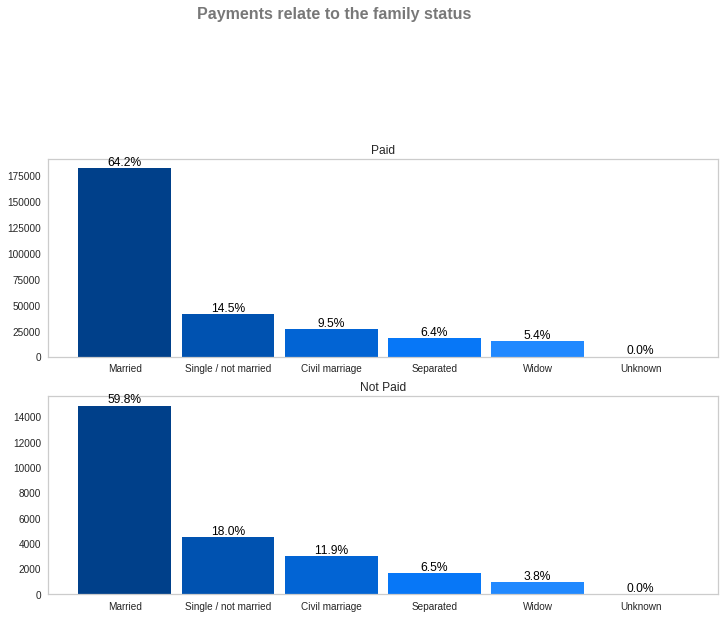

In [ ]:
plot_two_figures(df_status, df_status['Paid'], df_status['Not Paid'], 'Payments relate to the family status')

##ORGANIZATION_TYPE

In [ ]:
len(application_train_filter['ORGANIZATION_TYPE'].value_counts())/4

14.5

**Looking only at the top ten, it can be seen that the second highest which corresponds to 23.6% is what was not provided or is not in a organization**

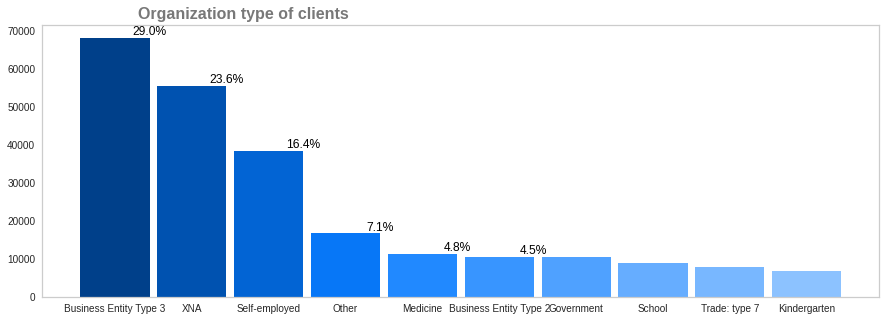

In [ ]:
plot_bars(df_value_counts(application_train_filter['ORGANIZATION_TYPE'], \
                          application_train_filter['ORGANIZATION_TYPE'].value_counts().index)[0:10], \
          application_train_filter['ORGANIZATION_TYPE'].value_counts().index, 'Organization type of clients', True)

In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_org = pd.DataFrame({
      'Payment': labels,
})
df_org

,Payment
0,Paid
1,Not Paid


In [ ]:
for i in application_train_filter['ORGANIZATION_TYPE'].value_counts().index:
  value = application_train_filter[application_train_filter['ORGANIZATION_TYPE'] == i]\
  .filter(['TARGET','ORGANIZATION_TYPE']).groupby('TARGET').count().values.ravel()
  value = pd.Series(value)
  df_org[i] = value

In [ ]:
df_org

,Payment,Business Entity Type 3,XNA,Self-employed,Other,Medicine,Business Entity Type 2,Government,School,Trade: type 7,...,Legal Services,Cleaning,Transport: type 1,Industry: type 6,Industry: type 10,Religion,Industry: type 13,Trade: type 4,Trade: type 5,Industry: type 8
0,Paid,61669,52384,34504,15408,10456,9653,9678,8367,7091,...,281,231,192,104,102,80,58,62,46,21
1,Not Paid,6323,2990,3908,1275,737,900,726,526,740,...,24,29,9,8,7,5,9,2,3,3


In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_org = pd.DataFrame({
      'Organization_Type' : df_org.columns[1:].values,
      'Paid' : df_org[df_org['Payment'] == 'Paid'].values.ravel()[1:],
      'Not Paid': df_org[df_org['Payment'] == 'Not Paid'].values.ravel()[1:]
})
df_org.head()

,Organization_Type,Paid,Not Paid
0,Business Entity Type 3,61669,6323
1,XNA,52384,2990
2,Self-employed,34504,3908
3,Other,15408,1275
4,Medicine,10456,737


**Business entity type 3 and self-employed not paid most than paid the loan**

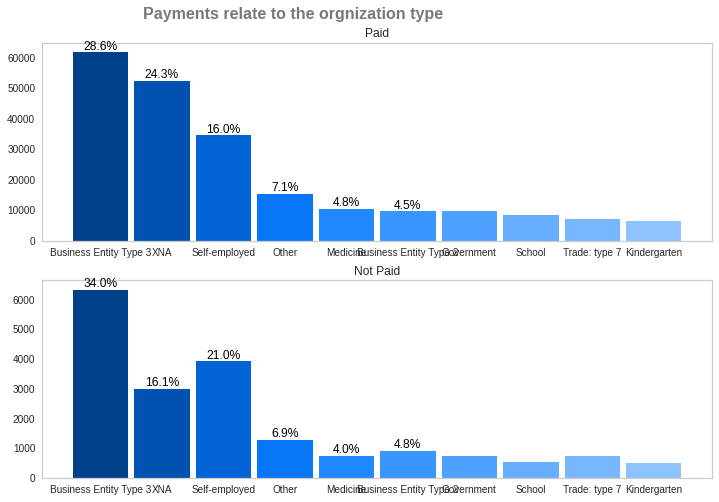

In [ ]:
plot_two_figures(df_org[0:10], df_org['Paid'][0:10], df_org['Not Paid'][0:10], 'Payments relate to the orgnization type')

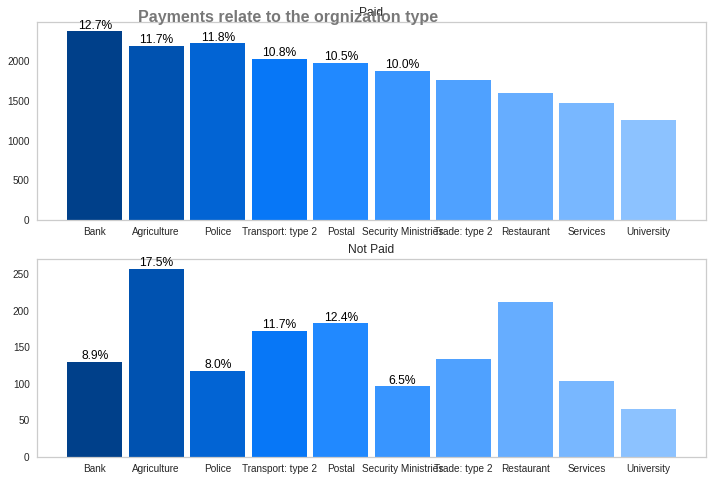

In [ ]:
plot_two_figures(df_org[20:30], df_org['Paid'][20:30], df_org['Not Paid'][20:30], 'Payments relate to the orgnization type')

##CNT_FAM_MEMBERS

**Most of clients has 2 family members**

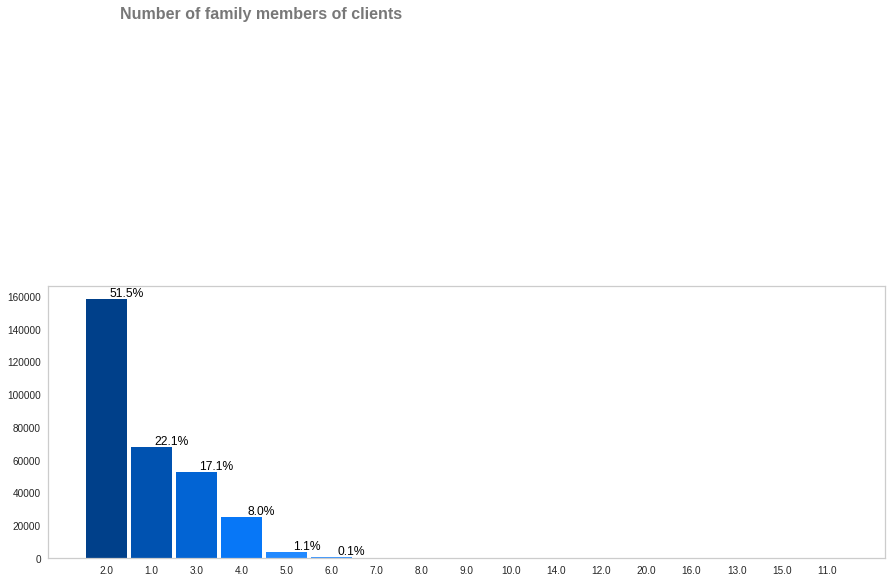

In [ ]:
plot_bars(df_value_counts(application_train_filter['CNT_FAM_MEMBERS'],\
                          application_train_filter['CNT_FAM_MEMBERS'].value_counts().index),\
          application_train_filter['CNT_FAM_MEMBERS'].value_counts().index, 'Number of family members of clients' ,True)

In [ ]:
application_train_filter['CNT_FAM_MEMBERS'].value_counts()

In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_members = pd.DataFrame({
      'Payment': labels,
})
df_members

,Payment
0,Paid
1,Not Paid


In [ ]:
for i in application_train_filter['CNT_FAM_MEMBERS'].value_counts().index:
  value = application_train_filter[application_train_filter['CNT_FAM_MEMBERS'] == i]\
  .filter(['TARGET','CNT_FAM_MEMBERS']).groupby('TARGET').count().values.ravel()
  value = pd.Series(value)
  df_members[i] = value

In [ ]:
df_members

,Payment,2.0,1.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,14.0,12.0,20.0,16.0,13.0,15.0,11.0
0,Paid,146348,62172,47993,22561,3151,353,75,14,6.0,2,2.0,2.0,2.0,2.0,1.0,1.0,1.0
1,Not Paid,12009,5675,4608,2136,327,55,6,6,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_members.fillna(0, inplace=True)

In [ ]:
df_members

,Payment,2.0,1.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,14.0,12.0,20.0,16.0,13.0,15.0,11.0
0,Paid,146348,62172,47993,22561,3151,353,75,14,6.0,2,2.0,2.0,2.0,2.0,1.0,1.0,1.0
1,Not Paid,12009,5675,4608,2136,327,55,6,6,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
labels = ['Paid', 'Not Paid']
labels = pd.Series(labels)
df_members = pd.DataFrame({
      'Family_Members' : df_members.columns[1:].values,
      'Paid' : df_members[df_members['Payment'] == 'Paid'].values.ravel()[1:],
      'Not Paid': df_members[df_members['Payment'] == 'Not Paid'].values.ravel()[1:]
})
df_members

,Family_Members,Paid,Not Paid
0,2.0,146348,12009
1,1.0,62172,5675
2,3.0,47993,4608
3,4.0,22561,2136
4,5.0,3151,327
5,6.0,353,55
6,7.0,75,6
7,8.0,14,6
8,9.0,6.0,0.0
9,10.0,2,1


Who has more family members, the greater the chance of not paid the loan

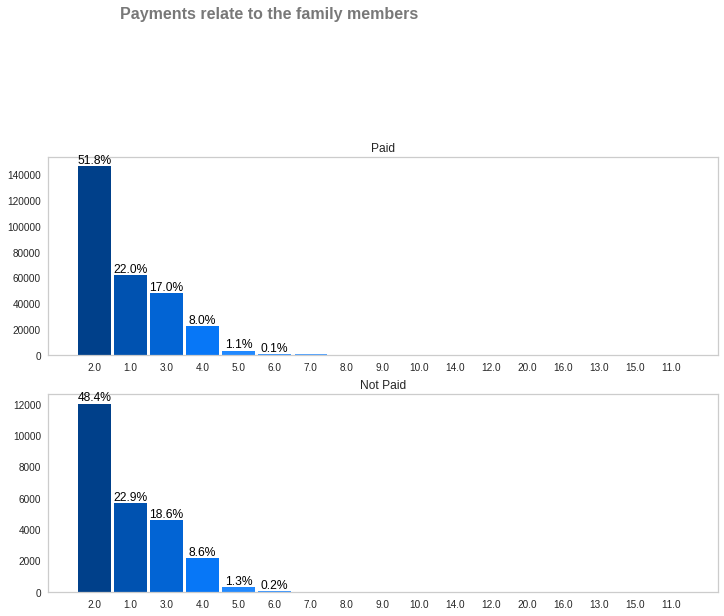

In [ ]:
plot_two_figures(df_members, df_members['Paid'], df_members['Not Paid'], 'Payments relate to the family members')